In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
%matplotlib inline

In [2]:
def get_obs_days(dt):
    dt = pd.to_datetime(dt)
    a = dt + relativedelta(months=1)
    b = dt + relativedelta(months=2)
    c = dt + relativedelta(months=3)
    d = dt + relativedelta(months=4)
    e = dt + relativedelta(months=5)
    f = dt + relativedelta(months=6)
    l = [a,b,c,d,e,f]
    return l

In [3]:
def split_df(df,dt):
    dt = pd.to_datetime(dt)
    l = get_obs_days(dt)
    df1 = df[dt:l[0]] 
    df2 = df[l[0]:l[1]]
    df3 = df[l[1]:l[2]]
    df4 = df[l[2]:l[3]]
    df5 = df[l[3]:l[4]]
    df6 = df[l[4]:l[5]]
    list = [df1,df2,df3,df4,df5,df6]
    return list

In [4]:
def month_pro(df, open_price, lowerbond, rate):
    knock_out = 0
    profit = 0
    loss= 0
    a = df[-1:].close.max()
    b = open_price.close.max()
    c = lowerbond.close.max()
    if a > b:
        print ('knock-out, knock-out!')
        profit = rate
        knock_out = 1
    elif a >= c:
        profit = rate
    else:
        profit = 0
    return [knock_out, profit]   

In [44]:
def knock_in(df, dt, mths, lowerbond):
    knock_in = 0
    dt = pd.to_datetime(dt)
    y = dt + relativedelta(months= mths )
    df1 = df[dt:y]
    df1.plot()
    if np.isnan(df1[df1 < lowerbond.close.min()].close.min())== 1:
        print ('did not knock-in!' )
        knock_in =1
        return knock_in
    else: 
        print ('knock-in, knock-in!')
        return knock_in

In [86]:
def final_rtn(df,dt,open_price, mths, m,cum_pro):
    dt = pd.to_datetime(dt)
    y = dt + relativedelta(months= mths )
    df1 = df[dt:y] 
    if ((df1[-1:].close.min() < open_price.close.min()) and (m == 0) )== True:
        final_rtn = cum_pro + ((df1[-1:].close.min() - open_price.close.min())/open_price.close.min())
        #print('hi')
    else:
        final_rtn = cum_pro
    return final_rtn

In [87]:
def phoenix_rtn(df, dt, months, rtn_rate, low_rate=0.7):
    list = split_df(df, dt)
    open_price = list[0][0:1]
    lowerbond = open_price*low_rate
    cum_pro = 0
    for i in list:
        result = month_pro(i, open_price, lowerbond, rtn_rate)
        cum_pro = cum_pro + result[1]
        if result[0] == 1:
            break
    m = knock_in(df, dt, months,lowerbond)
    total_rtn = final_rtn(df, dt, open_price, months, m, cum_pro)
    return total_rtn

    

In [116]:
df = pd.read_hdf('C:/Users/Administrator/Desktop/Work/Projects/Autocall/new000567.h5')
df.index = pd.to_datetime(df.index)

knock-in, knock-in!


-0.24130484723179418

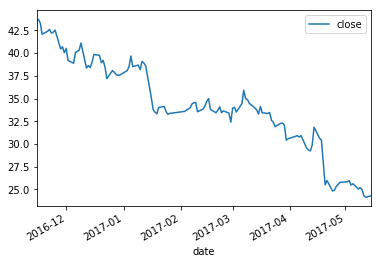

In [124]:
phoenix_rtn(df, '2016-11-15', 6, 0.04, 0.6)

In [41]:
#Toy model
df1 =pd.read_excel('C:/Users/Administrator/Desktop/Work/Projects/Autocall/fake_test_data.xlsx')
df1.index = df1.day
df1.drop('day',axis=1,inplace=True)
df1.columns = ['close']
df1

,close
day,
2017-01-05,100.00
2017-01-06,99.00
2017-01-07,98.00
2017-01-08,97.00
2017-01-09,96.00
2017-01-10,95.00
2017-01-11,94.00
2017-01-12,93.00
2017-01-13,92.00


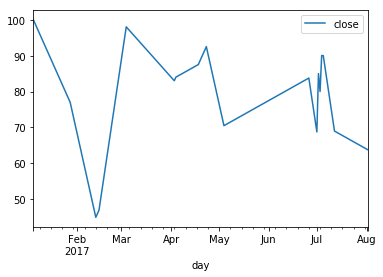

In [42]:
df1.plot()

In [18]:
phoenix_rtn(df1, '2017-01-04', 6, 0.025, 0.7)

knock-out, knock-out!
knock-in, knock-in!


0.07500000000000001

In [21]:
phoenix_rtn(df1, '2017-01-04', 6, 0.025, 0.7)

did not knock-in!


0.15

In [43]:
phoenix_rtn(df1, '2017-01-05', 6, 0.025, 0.7)

knock-in, knock-in!
hi


0.024999999999999994